In [1]:
import os
import glob
import copy
import time
import pickle
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
#from data_loader import*
from data_preprocessing import*

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2,l1
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
model = 'multi_objective_cnn'
dataset = '256_channel_cVEP'
mode = 'loso_subject'
with open('./results/{}/{}/{}/{}_{}.pickle'.format(model,dataset,mode,model,mode), 'rb') as handle:
        results = pickle.load(handle)

In [17]:
group = []
category_accuracy = []
sequence_accuracy = []
ITR = []
for i in results.keys():
    results_cv = results[i] 
    for j in range(1,len(results_cv)-1):
        group.append(i)
        category_accuracy.append(float(results_cv[j]['category_accuracy']))
        sequence_accuracy.append(float(results_cv[j]['sequence_accuracy']))
        ITR.append(float(results_cv[j]['ITR']))

In [19]:
sequence_accuracy

[2.3255813866853714,
 4.651162773370743,
 3.488372266292572,
 4.651162773370743,
 3.488372266292572,
 4.651162773370743,
 5.813953652977943,
 2.3255813866853714,
 2.3255813866853714,
 2.3255813866853714,
 3.488372266292572,
 2.3255813866853714,
 4.651162773370743,
 1.1627906933426857,
 2.3255813866853714,
 0.0,
 0.0,
 2.3255813866853714,
 1.1627906933426857,
 2.3255813866853714,
 1.1627906933426857,
 3.488372266292572,
 0.0,
 0.0,
 0.0,
 1.1627906933426857,
 0.0,
 2.3255813866853714,
 2.3255813866853714,
 2.3255813866853714,
 0.0,
 1.1627906933426857,
 0.0,
 2.3255813866853714,
 1.1627906933426857,
 2.3255813866853714,
 2.3255813866853714,
 1.1627906933426857,
 2.3255813866853714,
 2.3255813866853714,
 3.488372266292572,
 0.0,
 3.488372266292572,
 2.3255813866853714,
 3.488372266292572,
 4.651162773370743,
 1.1627906933426857,
 1.1627906933426857,
 3.488372266292572,
 3.488372266292572,
 2.3255813866853714,
 2.3255813866853714,
 3.488372266292572,
 1.1627906933426857,
 0.0,
 1.16279069

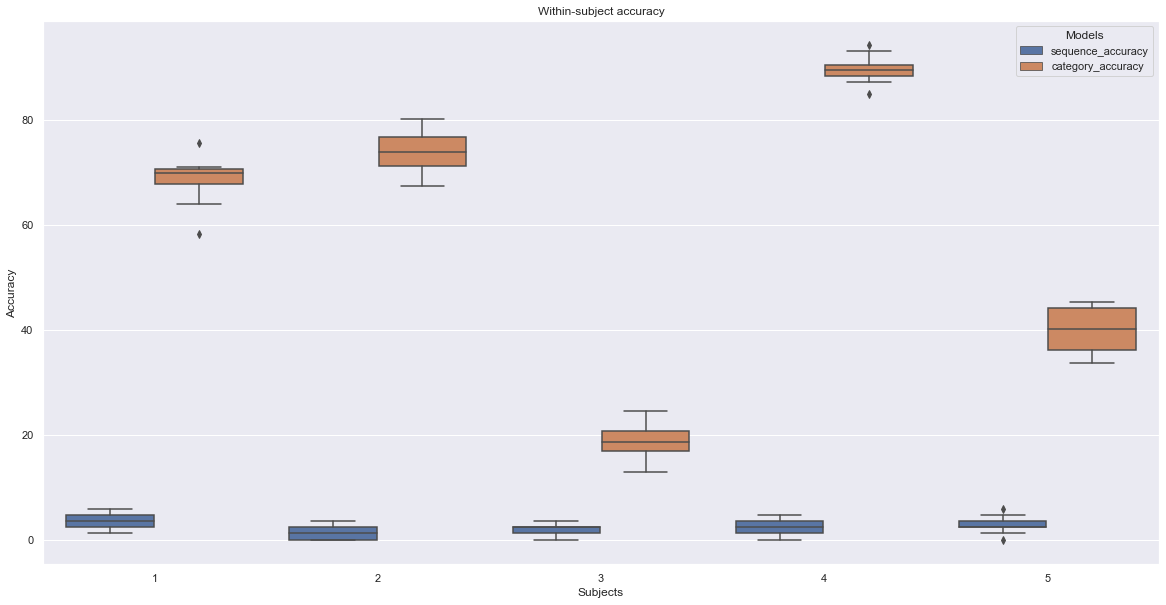

In [18]:
df = pd.DataFrame({'Subjects':group,'sequence_accuracy':sequence_accuracy,'category_accuracy':category_accuracy})
df = df[['Subjects','sequence_accuracy','category_accuracy']]

sns.set(rc={'figure.figsize':(20,10)})
dd=pd.melt(df,id_vars=['Subjects'],value_vars=['sequence_accuracy','category_accuracy'],var_name='Models')
ax = sns.boxplot(x='Subjects',y='value',data=dd,hue='Models')
ax.set_title('Within-subject accuracy')
ax.set(ylabel='Accuracy')
plt.show()

In [ ]:
group = []
category_accuracy = []
sequence_accuracy = []
ITR = []
for i in results_cnn_ts.keys():
    results_cv = results[i]
    
    for j in range(1,len(results_cv)-1):
        group.append(i)
        category_accuracy.append(float(results_cv[j]['category_accuracy']))
        sequence_accuracy.append(float(results_cv[j]['sequence_accuracy']))
        ITR.append(float(results_cv[j]['ITR']))

df = pd.DataFrame({'Subjects':group,'cnn_ts':cnn_ts_list,'cnn':cnn_list})
df = df[['Subjects','cnn_ts','cnn']]

sns.set(rc={'figure.figsize':(20,10)})
dd=pd.melt(df,id_vars=['Subjects'],value_vars=['cnn_ts','cnn'],var_name='Models')
ax = sns.boxplot(x='Subjects',y='value',data=dd,hue='Models')
ax.set_title('Within-subject accuracy')
ax.set(ylabel='Accuracy')
plt.show()

In [8]:
results[1][1].keys()

dict_keys(['category_accuracy', 'sequence_accuracy', 'ITR'])